### How to use **`estimate()`**

In [1]:
import math
import time
from passive_extended_matchgate_simulator.raw_estimation import raw_estimate
from passive_extended_matchgate_simulator.estimation import estimate
from passive_extended_matchgate_simulator.utils import (ucj_to_compatible,  
                                                        get_bitstrings_and_probs, 
                                                        make_parameterized_controlled_phase_circuit)

#### We'll create a circuit that has 12 qubits and 16 controlled-phase gates. Our matchgates will be initialized randomly, but our controlled-phase gate angles will be sampled from  $\sim \mathcal{N}(0, .1)$.

In [2]:
mean, var = 0, .1
norb, nelec = 6, (3,3)
circuit = make_parameterized_controlled_phase_circuit(norb, nelec, mean, var)
compatible = ucj_to_compatible(circuit)

#### For clarity, we'll draw the decomposed circuit, but use the original circuit for simulation since this is faster.

Our circuit contains the following gates:
OrderedDict({'xx_plus_yy': 60, 'p': 24, 'cp': 16, 'x': 6})


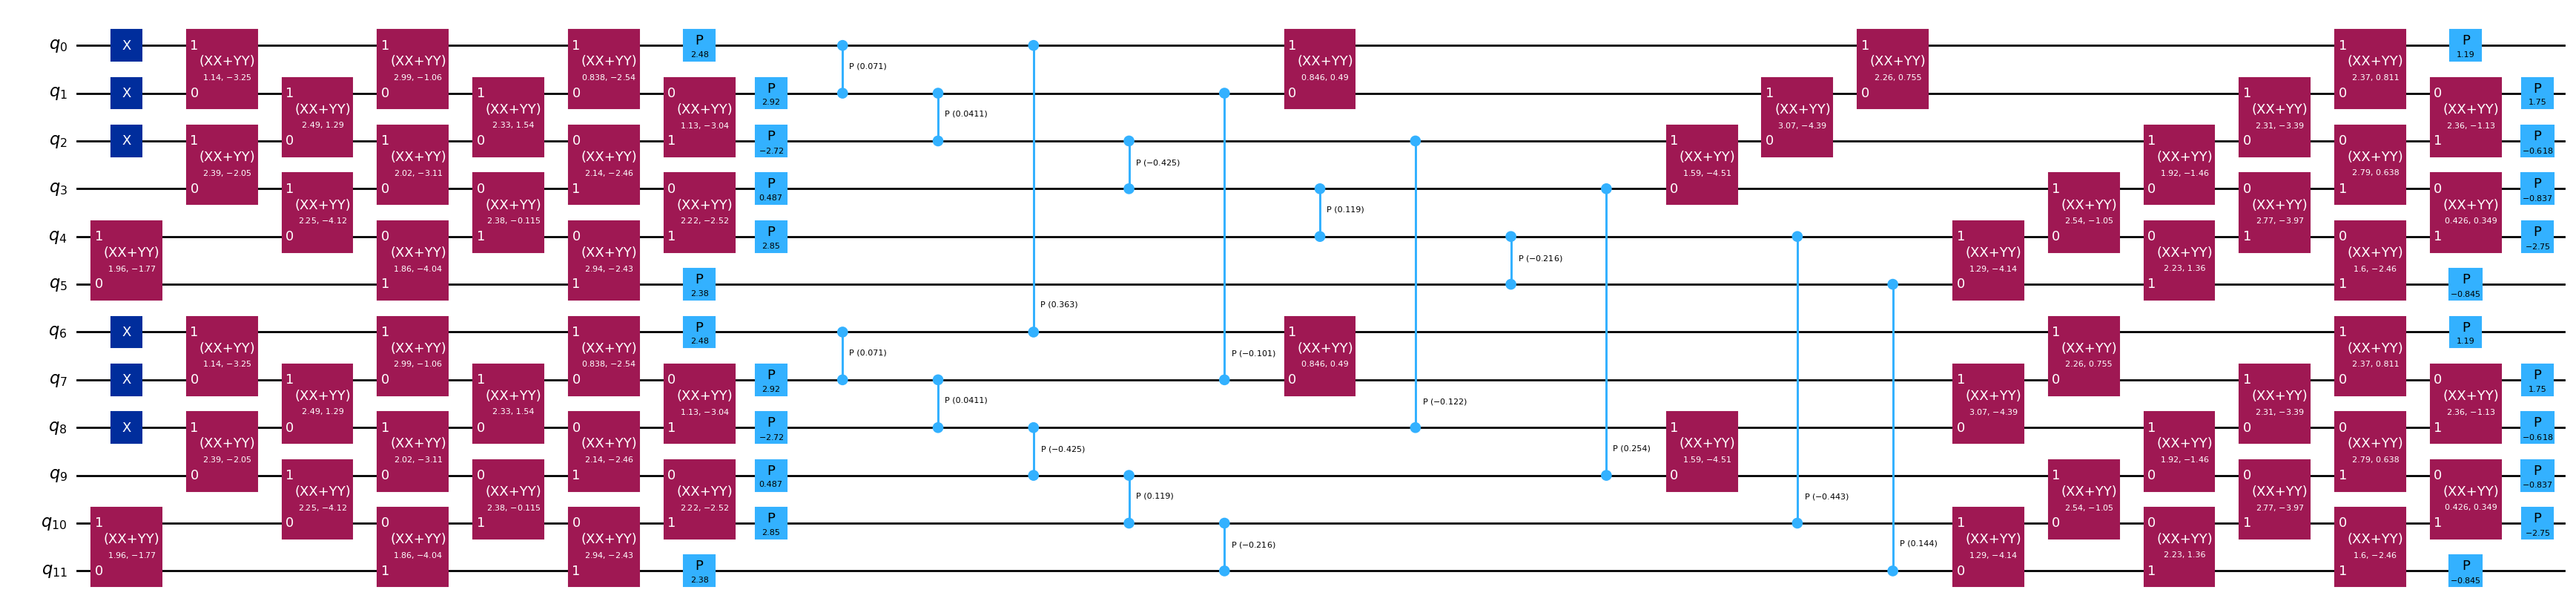

In [3]:
print("Our circuit contains the following gates:")
print(compatible.decompose(gates_to_decompose=['orb_rot_jw']).count_ops())
compatible.decompose(gates_to_decompose=['orb_rot_jw']).draw(fold=-1, output='mpl')

#### Let's compare how long it takes to obtain a probability estimate with **`estimate()`** vs **`raw_estimate()`** for small values of $\epsilon$ and $\delta$.

In [4]:
epsilon, delta, p = .01, .00001, 1
bitstring = 0b111000111000 # (A low probability bitstring)

In [5]:
t1 = time.perf_counter()
raw_est = raw_estimate(circuit=compatible, 
                   outcome_states=bitstring, 
                   epsilon=epsilon, 
                   delta=delta, 
                   p=p)
t2 = time.perf_counter()
raw_est_time = t2 - t1
print("Raw estimate probability:", raw_est)
print(f"Raw estimate time: {raw_est_time} seconds")

Raw estimate probability: 1.126972799013859e-07
Raw estimate time: 4.750148791004904 seconds


In [6]:
t1 = time.perf_counter()
est = estimate(circuit=compatible, 
               outcome_state=bitstring, 
               epsilon=epsilon, 
               delta=delta)
t2 = time.perf_counter()
est_time = t2 - t1
time.sleep(1)
print()
print("Raw estimate probability:", est)
print(f"Raw estimate time: {est_time} seconds")
print(f"Estimate speedup with respect to raw_estimate: {raw_est_time / est_time}x")

k: 1, pHat: 0.00000008158172326976998, eStar: 0.9996715687527757, epsTot: 0.01
k: 2, pHat: 0.000000153819295253852, eStar: 0.7062859847505568, epsTot: 0.01
k: 3, pHat: 0.00000039166013090351617, eStar: 0.39816595838040125, epsTot: 0.01
k: 4, pHat: 0.00000014185954078267062, eStar: 0.1971476912520923, epsTot: 0.01
k: 5, pHat: 0.00000009664972906180773, eStar: 0.0920306903727216, epsTot: 0.01
k: 6, pHat: 0.00000011293428673556508, eStar: 0.042369639904827075, epsTot: 0.01
k: 7, pHat: 0.0000001275919896676883, eStar: 0.01967915352349718, epsTot: 0.01
k: 8, pHat: 0.00000009588977360601927, eStar: 0.009292151879229896, epsTot: 0.01

Raw estimate probability: 9.588977360601927e-08
Raw estimate time: 0.18267775001004338 seconds
Estimate speedup with respect to raw_estimate: 26.002886453023134x
